In [4]:
# set up libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

True

In [6]:
# grab the intelimon data
intelimon_data = pd.read_csv(f"C:/Users/{os.getenv("MS_USER_NAME")}/Desktop/Hitchiti_IntensiveBiomass_TLSMetrics/merged_metrics.csv")
print(intelimon_data)

   Unnamed: 0.1 Unnamed: 0             h_filename    h_script_name  \
0             0        25%  GACHF_0046_20231127_1  IntELiMon_1.1.1   
1             1        25%  GACHF_0046_20231127_2  IntELiMon_1.1.1   
2             2        25%  GACHF_0047_20231127_1  IntELiMon_1.1.1   
3             3        25%  GACHF_0047_20231127_2  IntELiMon_1.1.1   
4             4        25%  GACHF_0048_20231127_1  IntELiMon_1.1.1   
5             5        25%  GACHF_0048_20231127_2  IntELiMon_1.1.1   

   h_ground_cnt  h_not_ground_cnt  h_per_ground  h_ng_tgi      h_ng_vari  \
0       1708526           1509268     53.096190  1.577028  474624.818404   
1       1091387           1478476     42.468684 -6.703746  390509.323676   
2       1746586           1160030     60.090015  4.808763  254232.952599   
3        248454            221124     52.910060 -6.038919  243176.519397   
4       1602504           1355043     54.183551  4.265567  292538.252386   
5        839699           1068262     44.010281 -7.29

In [17]:
# grab the biomass data
biomass_data = pd.read_csv(f"C:/Users/{os.getenv("MS_USER_NAME")}/Desktop/lidar_scan_calibration/csv_data/kriged_biomass_estimations.csv")
total_biomasses = biomass_data.loc[biomass_data["biomass_type"] == "total_biomass", "kriged_biomass"]
total_biomasses.reset_index(drop=True, inplace=True)
print(total_biomasses)

0    199007.668070
1    222088.136286
2    522953.588750
Name: kriged_biomass, dtype: float64


In [25]:
# add biomass data to intelimon data
intelimon_data.loc[0, "biomass"] = total_biomasses[0]
intelimon_data.loc[1, "biomass"] = total_biomasses[0]
intelimon_data.loc[2, "biomass"] = total_biomasses[1]
intelimon_data.loc[3, "biomass"] = total_biomasses[1]
intelimon_data.loc[4, "biomass"] = total_biomasses[2]
intelimon_data.loc[5, "biomass"] = total_biomasses[2]

print(intelimon_data["biomass"])

0    199007.668070
1    199007.668070
2    222088.136286
3    222088.136286
4    522953.588750
5    522953.588750
Name: biomass, dtype: float64


In [56]:
# find strong positive and negative correlations between intelimon variables and total biomass
coefficients = {}
strong_positive_correlates = []
strong_negative_correlates = []
for variable in intelimon_data.columns[4:-13]:
    corr_matrix = np.corrcoef(intelimon_data[variable], intelimon_data["biomass"])
    corr_coefficient = corr_matrix[0, 1]
    coefficients[variable] = corr_coefficient
    if corr_coefficient > 0.95:
        strong_positive_correlates.append((variable, corr_coefficient))
    elif corr_coefficient < -0.95:
        strong_negative_correlates.append((variable, corr_coefficient))
#print(sorted(coefficients.items(), key=lambda item: item[1]))
for correlate in sorted(strong_positive_correlates, key=lambda item: item[1], reverse=True):
    print(correlate)
print()
for correlate in sorted(strong_negative_correlates, key=lambda item: item[1]):
    print(correlate)

('USvol', 0.9979262805128155)
('h_OS_kurt', 0.994148454342267)
('h_l2_per', 0.985561549518801)
('h_GC_per', 0.980416018998884)
('h_zpcum1', 0.9790856891456269)
('h_l3_per', 0.9652473693981537)
('h_zpcum2', 0.9563201691996925)
('h_zpcum3', 0.952208180327391)

('h_zq35', -0.9898463611270423)
('h_pzabove2', -0.9867707940579834)
('h_l5_per', -0.9860381106305226)
('h_zq30', -0.975440348437628)
('h_US_median', -0.9552453860252038)
('h_OS_per', -0.9541619559142226)


It seems like the strong positive correlates tend to show that a high percentage of points are in low strata, while strong negative correlates show a high percentage of points in high strata.

For example, h_l2_per is "Percent of points in height strata 0.5-1.0 m of the normalized point cloud".
Meanwhile, h_zq35 is "The Thirty-fifth percentile height of points in the point cloud (includes ground points)".

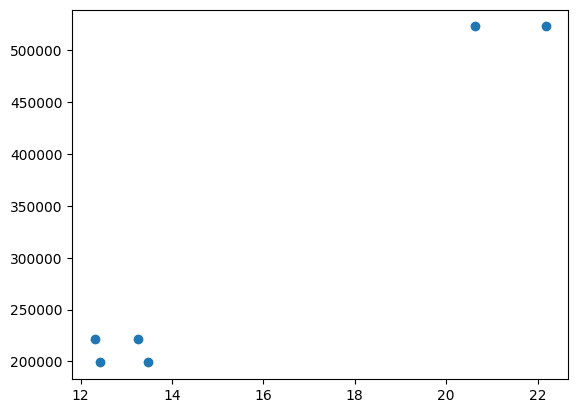

In [67]:
# plot typical strong positive correlation...
plt.scatter(intelimon_data["h_l2_per"], intelimon_data["biomass"])

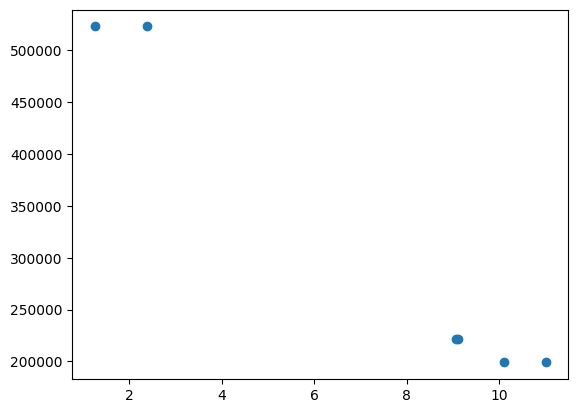

In [68]:
# and stong negative correlation
plt.scatter(intelimon_data["h_zq35"], intelimon_data["biomass"])

It's hard to know if the correlations are robust with so few data points.